<a href="https://colab.research.google.com/github/thiagosilva85/nlp/blob/main/Analise_Texto_com_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
!pip install pdfplumber -q

In [17]:
import pdfplumber
import pandas as pd
from collections import defaultdict, Counter
import nltk
import re
import plotly.express as px
import os

In [7]:
# Coletando o dataset 
!wget -P '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1' \
https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/planos_governo_eleicoes_2022.zip

--2022-09-23 01:44:30--  https://github.com/alexvaroz/data_science_alem_do_basico/raw/master/planos_governo_eleicoes_2022.zip
Resolving github.com (github.com)... 140.82.114.4
Connecting to github.com (github.com)|140.82.114.4|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/alexvaroz/data_science_alem_do_basico/master/planos_governo_eleicoes_2022.zip [following]
--2022-09-23 01:44:30--  https://raw.githubusercontent.com/alexvaroz/data_science_alem_do_basico/master/planos_governo_eleicoes_2022.zip
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14376349 (14M) [application/zip]
Saving to: ‘/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo_eleicoes_2022.zip’

planos_governo_elei 100%

In [8]:
!unzip '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo_eleicoes_2022.zip' -d \
'/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/'

Archive:  /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo_eleicoes_2022.zip
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_PUP.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_PTB.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_DC.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_NOVO.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_UNIAOBR.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_MDB.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/plano_PROS.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_PSTU.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/PlanoPT.pdf  
  inflating: /content/drive/MyDrive/7o_semestre/NLP/Trabalho1/plano

In [37]:
!wget -P '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo' \
https://static.poder360.com.br/2022/08/plano-ciro-tse-compactado_1.pdf

os.rename('/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/plano-ciro-tse-compactado_1.pdf',\
          '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/Plano_PDT.pdf')


--2022-09-23 04:23:14--  https://static.poder360.com.br/2022/08/plano-ciro-tse-compactado_1.pdf
Resolving static.poder360.com.br (static.poder360.com.br)... 172.67.20.129, 104.22.40.220, 104.22.41.220, ...
Connecting to static.poder360.com.br (static.poder360.com.br)|172.67.20.129|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 5639027 (5.4M) [application/pdf]
Saving to: ‘/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/plano-ciro-tse-compactado_1.pdf’

plano-ciro-tse-comp 100%[===================>]   5.38M  --.-KB/s    in 0.1s    

2022-09-23 04:23:14 (42.9 MB/s) - ‘/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/plano-ciro-tse-compactado_1.pdf’ saved [5639027/5639027]



In [59]:
pdfplanoPDT = 'Plano_PDT.pdf'

pdf=pdfplumber.open(pdfplanoPDT)

print(pdf.pages[15].extract_text())

PROGRAMA  DE  GOVERNO  DE  CIRO  GOMES  2  O 2  2 
Combate  ao 
desemprego! 
à 
pobreza! 
à 
desigualdade 
à 
e  fome 
O desemprego,  a pobreza e a fome aumentaram  de forma  trágica  no Brasil em função  de 
um modelo  econômico  que, baseado  na concentração  de renda, é seguido  há décadas. 
O PND irá deflagrar  um conjunto  de ações  para gerar  crédito,  renda  e emprego  no mais 
curto  prazo e, simultaneamente,  reduzir  a pobreza  e a fome.  Entre as principais  ações, 
destacamos  as seguintes: 
Crédito popular - Vamos  refinanciar  as dívidas  das  famílias  e das  empresas,  de forma 
que possam  reestabelecer  o crédito  e ajudar  na engrenagem  da economia.  Levando em 
conta  que a dívida  médias  das pessoas  é de RS 4,2 mil reais - quantia  que a maioria  não 
tem como  pagar- a proposta  do PND é estimular  os credores  a dar um desconto  de 70%, 
reduzindo  essa  dívida  média  pra cerca  de R$ 1.400. Esse valor  seria  então  financiado 
pela Caixa Econômica  e o Ban

In [39]:
path = '/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/planos_governo/'
nltk.download('stopwords')

os.chdir(path)
listaArquivos = os.listdir(path)

df_final=pd.DataFrame(columns=['Palavra','Quantidade','Plano'])

for i in range(0,len(listaArquivos)):
  arquivoPdf = listaArquivos[i]
  print("Iniciado leitura do plano de Governo - "+arquivoPdf)
  pdf=pdfplumber.open(path+arquivoPdf)
  conteudo=''
  for item in pdf.pages:
    conteudo=conteudo+item.extract_text()
  stopwords = nltk.corpus.stopwords.words('portuguese')
  # lowercase
  conteudo = conteudo.lower()
  # retirar pontuacao
  conteudo = re.sub(r'[^\w\s]',' ', conteudo)
  # tokenizar
  conteudo = re.findall(r'\w+',conteudo)
  conteudo_limpo=[]
  for item in conteudo:
    if (item not in stopwords) & (len(item)>1):
      conteudo_limpo.append(item)
  conteudo_limpo=Counter(conteudo_limpo)
  conteudo_limpo=conteudo_limpo.most_common(30)
  df=pd.DataFrame(conteudo_limpo, columns=['Palavra','Quantidade'])
  plano=re.sub('.pdf','',listaArquivos[i])
  df['Plano'] = plano
  df_final=pd.concat([df_final,df], ignore_index=True)
  i=i+1

print("\nTodos os planos de governo foram lidos e tratados.")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Iniciado leitura do plano de Governo - Plano_PUP.pdf
Iniciado leitura do plano de Governo - Plano_PTB.pdf
Iniciado leitura do plano de Governo - Plano_DC.pdf
Iniciado leitura do plano de Governo - Plano_NOVO.pdf
Iniciado leitura do plano de Governo - Plano_UNIAOBR.pdf
Iniciado leitura do plano de Governo - Plano_MDB.pdf
Iniciado leitura do plano de Governo - plano_PROS.pdf
Iniciado leitura do plano de Governo - Plano_PSTU.pdf
Iniciado leitura do plano de Governo - PlanoPT.pdf
Iniciado leitura do plano de Governo - Plano_PDT.pdf
Iniciado leitura do plano de Governo - Plano_PL.pdf
Iniciado leitura do plano de Governo - Plano_PCB.pdf

Todos os planos de governo foram lidos e tratados.


In [41]:
df_final.groupby('Plano').nunique()

,Palavra,Quantidade
Plano,,
PlanoPT,30,15
Plano_DC,30,8
Plano_MDB,30,14
Plano_NOVO,30,16
Plano_PCB,30,14
Plano_PDT,30,14
Plano_PL,30,21
Plano_PSTU,30,17
Plano_PTB,30,8


In [60]:
fig = px.bar(df_final.head(30), x='Palavra', y='Quantidade')
fig.show()

In [ ]:
!pip3 uninstall PIL
!pip3 uninstall Pillow
!pip3 install Pillow

In [23]:
!pip install -q goose3

In [24]:
import numpy as np
from plotly.subplots import make_subplots
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from goose3 import Goose

In [44]:
words = df_final['Palavra']
all_words = ' '.join(w for w in words)

In [56]:
mask = np.array(Image.open('/content/drive/MyDrive/7o_semestre/NLP/Trabalho1/br.jpg'))

In [57]:
wc = WordCloud(stopwords = STOPWORDS,
               mask = mask, background_color = "white",
               max_words = 2000, max_font_size = 500,
               random_state = 42, width = mask.shape[1],
               height = mask.shape[0])

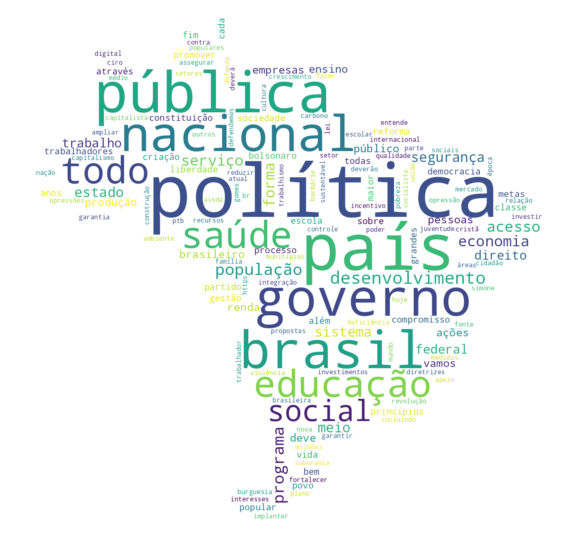

In [58]:
wc.generate(all_words)
fig, ax = plt.subplots(figsize=(10,10))
ax.imshow(wc, interpolation="bilinear")
ax.axis('off')
plt.show()